In [24]:
import sys
import math
import string
import operator
import collections
import datetime
import itertools
import functools

import numpy as np

import matplotlib
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

import IPython
import sympy as sp
import spb
import sympy.core.random as spr
import sympy.stats as ss
import scipy.stats as sps
import sympy.plotting as splt
import sympy.physics.vector as spv
import sympy.physics.mechanics as spm

import IPython.display as ipd
spv.init_vprinting()
%matplotlib inline


In [25]:
HALF = sp.S.Half
PI = sp.pi
E = sp.exp
POSITIVEINFINITY = sp.S.Infinity
NEGATIVEINFINITY = sp.S.NegativeInfinity

In [26]:
def print_aligned_latex_equations(*args):
    result = r"\\".join(
        [
            r"\begin{equation}",
            r"\begin{split}",
            *args,
            r"\nonumber" r"\end{split}",
            r"\end{equation}",
        ]
    )

    ipd.display(ipd.Math(rf"{result}"))

In [27]:
import doctest

# Distributions

## Binomial, Bernoulli

In statistics, the **binomial distribution** is a discrete probability 
distribution that describes the probability of getting a certain number 
of successes in a fixed number of trials. The binomial distribution is 
a special case of the Bernoulli distribution, which is a discrete 
probability distribution that describes the probability of getting 
a single success in a single trial.

The binomial distribution has two parameters:

* **n:** The number of trials.
* **p:** The probability of success on a single trial.

The probability of getting a certain number of successes in a 
binomial distribution is given by the following formula:

$$P(x) = {}^nC_x  p^x  (1 - p)^{(n - x)}$$


where:

* **x:** The number of successes.
* **${}^nC_x$:** The binomial coefficient, which is the number of ways 
to choose x successes from n trials.

The binomial distribution is a very useful distribution in statistics, 
as it can be used to model a wide variety of phenomena. For example, the
binomial distribution can be used to model the probability of getting a

* certain number of heads in a coin toss, 
* the probability of getting a certain number of successes in a survey, 
or 
* the probability of getting a certain number of defective items in a 
production run.

Here are some examples of how the binomial distribution can be used:

* A coin is tossed 10 times. What is the probability of getting 5 heads?


The binomial distribution is a powerful tool that can be used to model 
a wide variety of phenomena.

### Multiple Choice Test

A multiple choice test has 4 questions, each with 4 possible answers. James is taking the test,
but has no idea at all about the correct answers. So he guesses every answer and, therefore,
has the probability of 1/4 of getting any individual question correct.

Let $X$ denote the number of correct answers in James' test. $X$ follows the binomial distribution
with $n = 4 \land \pi = 0.25$
$$X \sim Bin(4, 0.25)$$
For example, what is the probability that James gets 3 of the 4 questions correct?

In [28]:
X = ss.Binomial("N", 4, 0.25)
display(round(ss.P(sp.Eq(X,3)),4))
ss.density(X).dict

### Multiple Choice Test

Now assume there are $n = 20$ questions, each with 4 possible answers.
More generally, consider a student who has the same probability of the 
correct answer for every question, so that $X \sim Bin(20, \pi)$.

The figure below shows plots of the probabilities for $mu$
$\pi = 0.25, 0.5, 0.7, 0.9$ (reflectingstudents of differing abilities, 
i.e. the better the student the more likely s/he is to get the answer 
correct and hence a higher $\pi$).

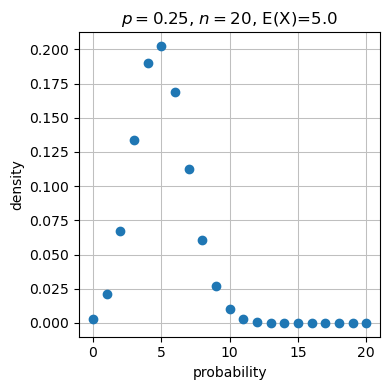

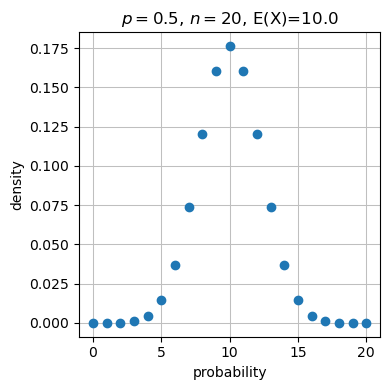

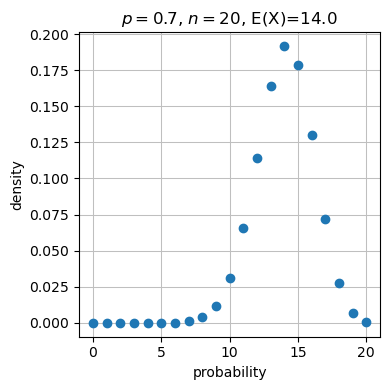

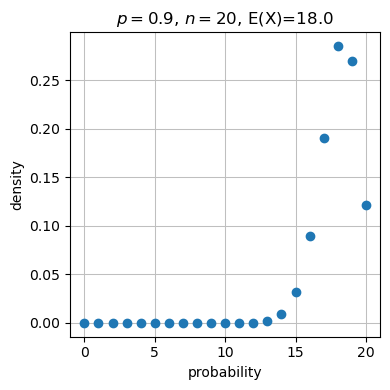

In [92]:
backend = spb.MB

n = 20
pi = [0.25, 0.5, 0.7, 0.9]

X = [ss.Binomial(f"X_{ix}", n, p) for ix, p in enumerate(pi)]

for ix, b in enumerate(X):
    pmf = ss.density(X[ix]).dict
    title =  (
        rf"$p=${sp.latex(pi[ix])}, $n=20$, E(X)={sp.latex(ss.E(X[ix]))}" 
    )
    
    spb.plot_list(
        list(pmf.keys()), list(pmf.values()), 
        title = title, 
        xlabel = "probability", ylabel = "density", 
        size=(4,4), is_point=True, 
        backend=backend
    )

### Example Coin Toss

A coin is tossed 10 times. What is the probability of getting 5 heads?

In [30]:
n = 10  # number of coin tosses
p = 0.5  # probability of getting heads on a single toss

B = ss.Binomial("B", n, p)  # Binomial distribution object

# Calculate the probability of getting 5 heads
probability_of_5_heads = ss.density(B).dict[5]

# Calculate the probability of getting 5 heads using P()
probability_of_5_heads_using_P = ss.P(sp.Eq(B, 5))

# Print the results
probability_of_5_heads, probability_of_5_heads_using_P

# Store probabilities in a list for display
text_density = r"\textrm{ with density function}"
text_P = r"P(B = 5) \textrm{ with P function}"

probabilities = [
    f"{text_density}  & :{probability_of_5_heads }", 
    f"{text_P}  & :{probability_of_5_heads_using_P}", 
]


# Print aligned LaTeX equations
print_aligned_latex_equations(*probabilities)

<IPython.core.display.Math object>

### Example Dancers

In a university $8\%$ of students are members of the university 
dance club. A random sample of 36 students is taken from the university.

The random variable $X$ represents the number of these students who 
are members of the dance club.

* Using a suitable model for $X$, find
    * $P(X = 4)$  
    * $P(X \ge 7)$


In [6]:
# Constants
PROBABILITY_DANCER = 0.08
PROBABILITY_TANGOER = 0.12

# Define symbols
x = sp.symbols('x')

sample_size = 36
# Binomial distribution with sample size and probability
X = ss.Binomial("X", n=sample_size, p=PROBABILITY_DANCER)

# Calculate and round the probability P(X = 4)
PX_eq_4 = round(ss.P(sp.Eq(X, 4)).evalf(), 3)

# Calculate and round the probability P(X >= 7)
PX_ge_7 = round(ss.P(X >= 7).evalf(), 3)

# Store probabilities in a list for display
probabilities = [
    f"P(X = 4) & :{PX_eq_4}", 
    f"P(X >= 7) & :{PX_ge_7}"
]

# Print aligned LaTeX equations
print_aligned_latex_equations(*probabilities)

<IPython.core.display.Math object>

## Normal Distribution

### Example Heights of Women

The heights of females from a country are normally distributed with a 
mean of $166.5$ cm and a standard deviation of $6.1$ cm

Given that 1% of females from this country are shorter than $k$ cm a) 
find the value of $k$, b) Find the proportion of females from this 
country with heights  between $150$ cm and $175$ cm

In [7]:
female_height_mu, female_height_rho = sp.symbols(
    "female\;height_mu, female\;height_rho", 
    real=True, positive=True
)

x, k = sp.symbols("x k")

percentage_females_shorter = sp.Symbol(
    "percentage\;females\;shorter", real=True, positive=True
)

values = {
    female_height_mu:166.5, 
    female_height_rho:6.1,
    percentage_females_shorter: sp.Rational(1, 100)
}

female_normal = ss.Normal(
    "X_f", mean=female_height_mu, std=female_height_rho
)

cdf_for_k = ss.cdf(female_normal)(k)

resultk = sp.solve(
    sp.Lt(
        cdf_for_k.subs(values), 
        values[percentage_females_shorter]
    ), k
).evalf()

cdf_text = r"\textrm{cdf upto k} &:"
resultk_value = math.floor(resultk.rhs)
resultk_text = r"\textrm{Inequality expression for k} &:"
resultk_value_text = r"\textrm{Value for k} &:"

print_aligned_latex_equations(
    rf"{cdf_text} {spv.vlatex(cdf_for_k)}",
    rf"{resultk_text} {spv.vlatex(resultk)}",
    rf"{resultk_value_text} {spv.vlatex(resultk_value)}"
)

<IPython.core.display.Math object>

### Example Probability of height range

A female, from this country, is chosen at random from those with 
heights between $150$ cm and $175$ cm

Find the probability that her height is more than $160$ cm


In [8]:
female_height_mu, female_height_rho = sp.symbols(
    "female\;height_mu, female\;height_rho", 
    real=True, positive=True
)

x, k = sp.symbols("x k")


values = {
    female_height_mu:166.5, 
    female_height_rho:6.1
}

female_normal = ss.Normal(
    "X_f", mean=female_height_mu, std=female_height_rho
)


less_than_150cm = (
    ss.cdf(female_normal)(x)
    .subs(values)
    .subs(x,150)
    .evalf()
)

less_than_175cm  = (
    ss.cdf(female_normal)(x)
    .subs(values)
    .subs(x,175)
    .evalf()
)

between_150_175cm = less_than_175cm - less_than_150cm

normal_female_text = r"\textrm{Normally distibuted female height} &:"

between_150_175text = (
    r"\textrm{Probability height between 150, 175} &:"
)

print_aligned_latex_equations(
    rf"{normal_female_text} {spv.vlatex(ss.cdf(female_normal)(x))}",
    rf"{between_150_175text} {spv.vlatex(round(between_150_175cm,3))}"
)


<IPython.core.display.Math object>

## Hythpothesis Test heights of females 

The heights of females from a different country are normally 
distributed with a standard deviation of $7.4$ cm

It is believed that the mean height of females from this country is 
less than $166.5$ cm. A random sample of $50$ females from  this 
country and finds the mean of the sample is $164.6$ cm

Carry out a suitable test to assess the validity of this claim.

* State your hypotheses clearly
* Use a $5 \%$ level of significance


In [9]:
Z = ss.Normal('Z', 166.5, 7.4/sp.sqrt(50))

resultP = ss.P(sp.Lt(Z,164.6)).evalf(3)
resultP_text = r"\textrm{Probability of mean less than 164.6} &:"
resultP_value_text = (
    r"\textrm{Reject H0}" 
        if (resultP < 0.05) 
        else  r"\textrm{Fail to reject H0} " 
)

print_aligned_latex_equations(
    rf"{resultP_text} {spv.vlatex(resultP)}",
    rf"{resultP_value_text}"
)

<IPython.core.display.Math object>

# Product Moment Correlation Coefficient



## Pearson's Correlation Coefficient

Find the product moment correlation coefficient between x and y for 
this data.

In [10]:
x = [3, 6, 8, 7, 5, 3, 11, 3, 4, 5, 4, 9, 7, 10, 6, 6]
y = [7, 7, 4, 4, 6, 8, 5, 5, 8, 4, 7, 4, 5, 5, 6, 3]

# Calculate the correlation coefficient and p-value

pearson_correlation, p_value = sps.pearsonr(x, y)

pearson_correlation_results = [
    fr"\textrm{{Correlation }}&:" 
    fr"{sp.latex(round(pearson_correlation, 3))}",
    fr"\textrm{{Significance}}&:" 
    fr"{sp.latex(round(p_value, 3))}",
]

print_aligned_latex_equations( *pearson_correlation_results )


<IPython.core.display.Math object>

### Intepretation of Pearson Correlation Coeeficient

When interpreting the results from `Pearsonr`, the following information is provided:

```
Correlation: -0.545
Significance: 0.029
```

1. Correlation: The correlation coefficient represents the strength and direction of the linear relationship between the two variables. In this case, the correlation coefficient is -0.545, indicating a negative correlation. The negative sign indicates that as one variable increases, the other variable tends to decrease, and vice versa. The magnitude of -0.545 suggests a moderate negative correlation.

2. Significance: The significance value, often referred to as the p-value, represents the probability of observing a correlation coefficient as extreme as the one calculated (or even more extreme) under the null hypothesis that there is no correlation between the two variables. In this case, the p-value is 0.029, which is below the conventional significance level of 0.05. It indicates that there is sufficient evidence to reject the null hypothesis and conclude that there is a statistically significant correlation between the variables.

Overall, based on the provided results, there is a moderate negative correlation (-0.545) between the variables, and this correlation is statistically significant (p-value = 0.029).